# NEPAL GIS EDA Assignments

In [ ]:
#installing all the required libraries

In [2]:
pip install -r "requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
# Path of the shape file
path = "datas/vector/Shape_Data/local_unit.shp"
# Loading the shape file
gdf = gpd.read_file(path)

In [6]:
gdf

STATE_CODE       DISTRICT                  GaPa_NaPa          Type_GN  \
0             1      TAPLEJUNG            Aathrai Tribeni       Gaunpalika   
1             1      TAPLEJUNG                 Maiwakhola       Gaunpalika   
2             1      TAPLEJUNG                  Meringden       Gaunpalika   
3             1      TAPLEJUNG                 Mikwakhola       Gaunpalika   
4             1      TAPLEJUNG               Phaktanglung       Gaunpalika   
..          ...            ...                        ...              ...   
772           4  NAWALPARASI_E     Chitawan National Park    National Park   
773           5        RUKUM_E                      Bhume       Gaunpalika   
774           5        RUKUM_E           Putha Uttarganga       Gaunpalika   
775           5        RUKUM_E                      Sisne       Gaunpalika   
776           5        RUKUM_E  Dhorpatan Hunting Reserve  Hunting Reserve   

    Province                                           geometry  
0          1  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1          1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2          1  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3          1  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4          1  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  
..       ...                                                ...  
772  Gandaki  POLYGON ((84.32537 27.68957, 84.32562 27.6894,...  
773        5  POLYGON ((82.65382 28.65759, 82.65428 28.65724...  
774        5  POLYGON ((82.76718 28.80407, 82.76748 28.80383...  
775        5  POLYGON ((82.67327 28.85214, 82.67373 28.85205...  
776        5  POLYGON ((82.87365 28.83199, 82.87402 28.83178...  

[777 rows x 6 columns]

In [14]:
# Checking the basic informations
print("Head:: \n" , gdf.head())
print("\nCRS:: \n" , gdf.crs)
print("\nGeometry:: \n", gdf.geometry)

Head:: 
    STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  

CRS:: 
 GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]

Geometry:: 
 0 

# Pre Data Processing


In [ ]:
# Checking the quality of data
print(gdf.isnull().sum()) # Counting the missing values in each columns

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64


In [16]:
print(gdf.describe())  # Numeric columns summary

       STATE_CODE
count  777.000000
mean     3.651223
std      2.000799
min      1.000000
25%      2.000000
50%      3.000000
75%      5.000000
max      7.000000


In [19]:
print(gdf["STATE_CODE"].value_counts().sort_index())

STATE_CODE
1    139
2    140
3    124
4     89
5    113
6     79
7     93
Name: count, dtype: int64


# Visualization

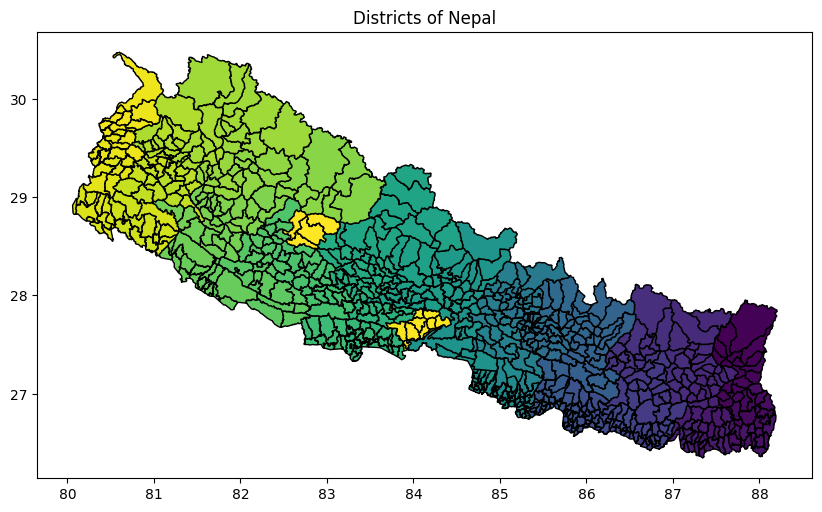

In [27]:
# plotting the GIS data of Nepal
gdf.plot(figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Districts of Nepal")
plt.show()

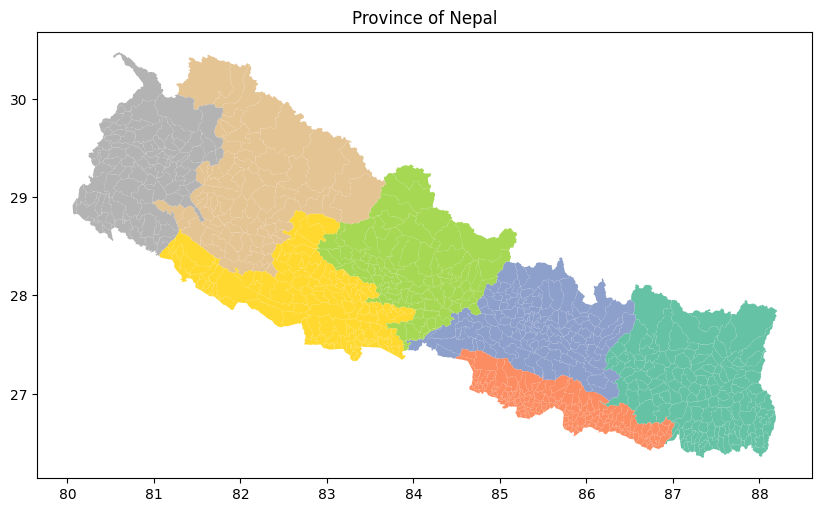

In [33]:
# Plot by State Code
gdf.plot(column="STATE_CODE", cmap="Set2", legend=False, figsize=(10, 6))
plt.title("Province of Nepal")
plt.show()

# Loading a raster file

In [34]:
import rasterio
import numpy as np

In [55]:
# loading raster file
raster_path_2020 = "datas/rastar/nepal_climate_data/nepal_precipitation_2020.tif"
raster_path_2050 = "datas/rastar/nepal_climate_data/nepal_precipitation_2050.tif"

def read_raster(path):
	with rasterio.open(path) as src:
		bands = [src.read(i) for i in range(1, src.count + 1)]  # Read all bands

		return bands

In [59]:
temp_2020 = read_raster(raster_path_2020)
type(temp_2020)


list

In [62]:
len(temp_2020)

12

# Visualize with raster data 

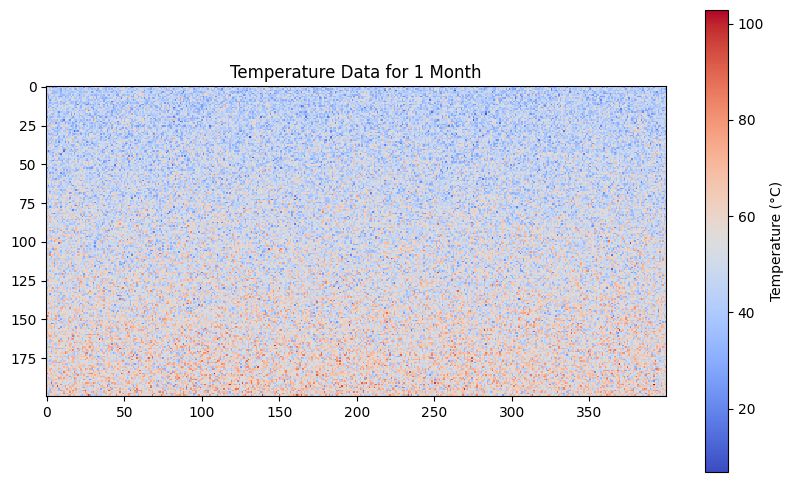

Mean: 42.31005499900533
Standard Deviation: 8.787518045476283
Max: 70.44749760211998
Min: 20.786830317934463


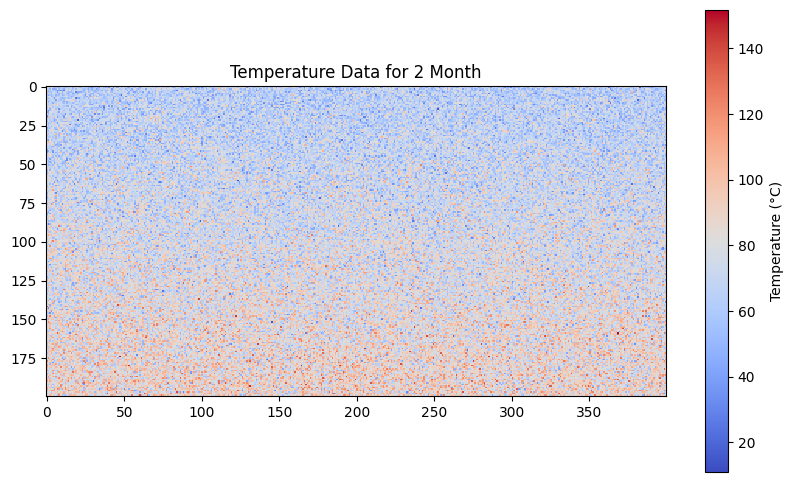

Mean: 63.92861839095469
Standard Deviation: 12.930315583335693
Max: 104.78641031421208
Min: 20.378953387794514


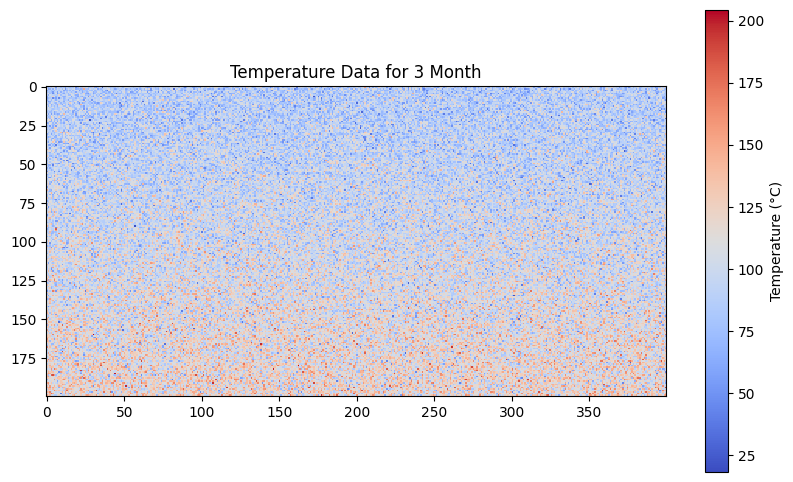

Mean: 85.59144426150324
Standard Deviation: 16.961057104755174
Max: 130.8809776264028
Min: 41.36844847009772


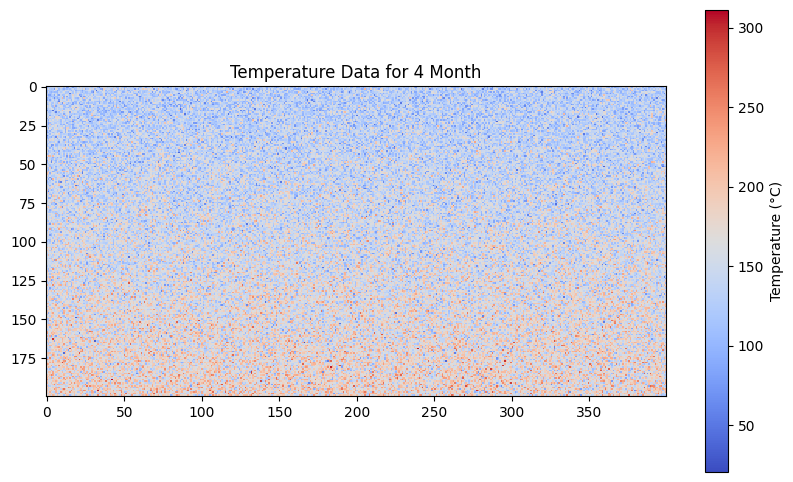

Mean: 129.9885548173454
Standard Deviation: 26.278796183205188
Max: 218.68889421205995
Min: 52.29494240152089


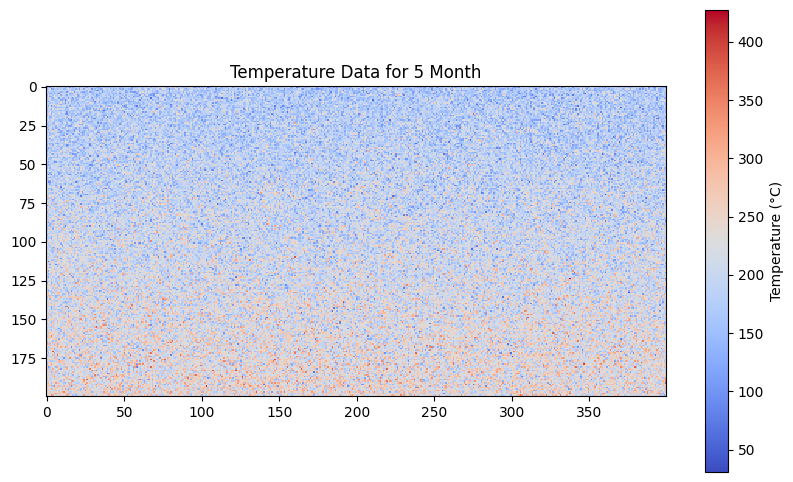

Mean: 169.757221983575
Standard Deviation: 35.62744405848448
Max: 273.00106493497816
Min: 47.769834215490455


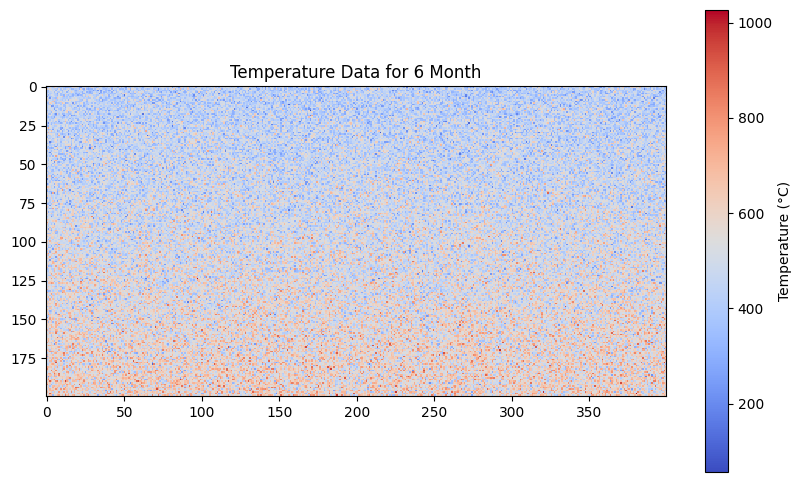

Mean: 428.1428550580976
Standard Deviation: 85.1867214339635
Max: 637.8211354864778
Min: 131.09012582769338


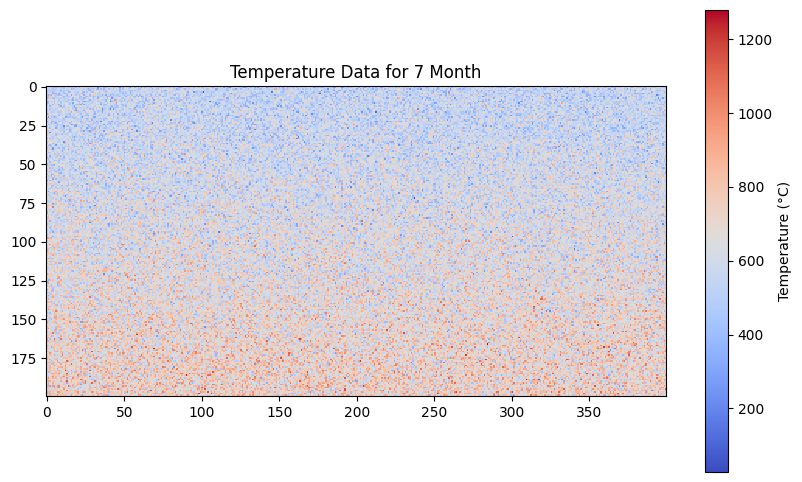

Mean: 528.8017206520107
Standard Deviation: 106.29964071449312
Max: 838.3828233054297
Min: 218.93262951765374


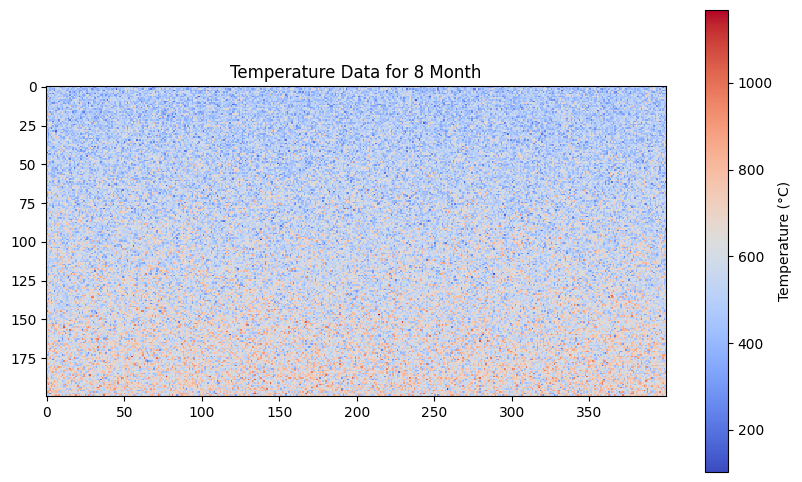

Mean: 481.86791927673215
Standard Deviation: 88.79673431225703
Max: 744.0162240804467
Min: 273.9030175072769


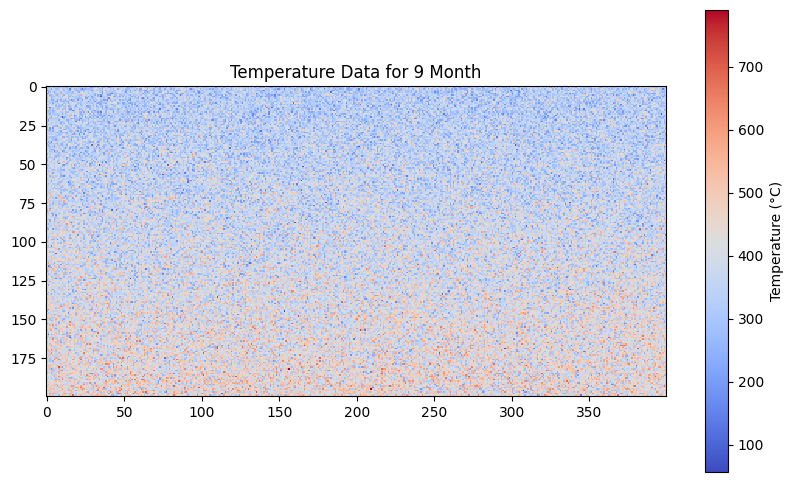

Mean: 326.56784456995535
Standard Deviation: 65.53481648413299
Max: 542.4789007137078
Min: 154.16757129580392


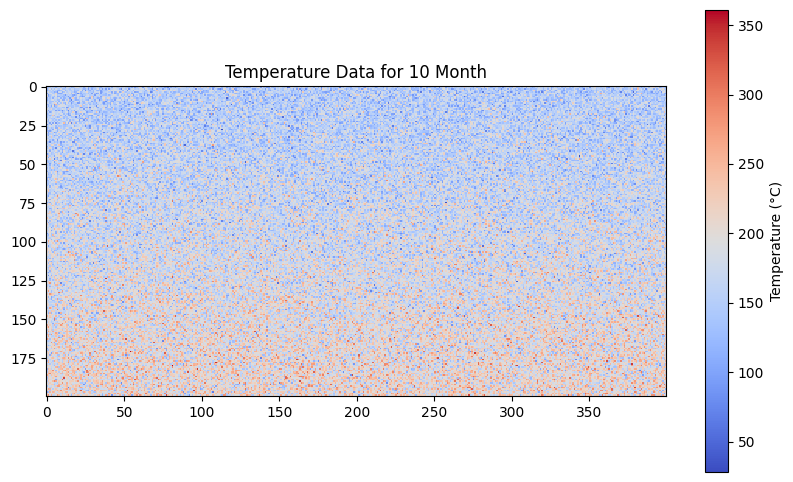

Mean: 152.63685523160765
Standard Deviation: 30.817991634325214
Max: 256.3683108702616
Min: 69.78283223083457


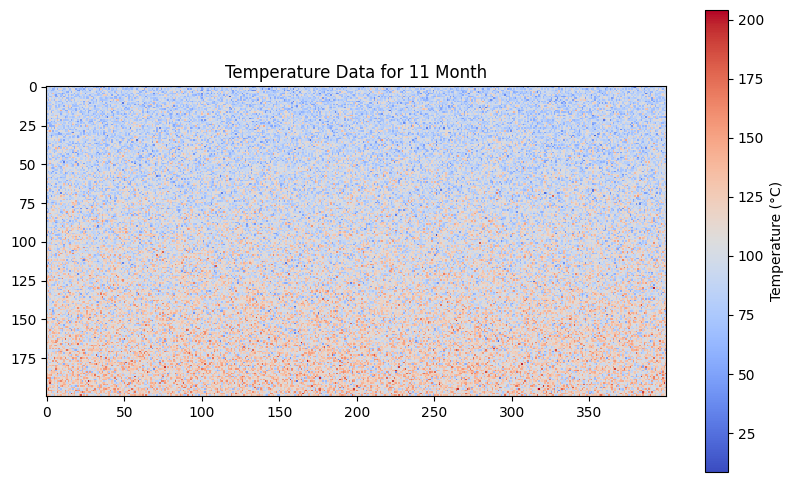

Mean: 87.82600280524042
Standard Deviation: 16.64276931607169
Max: 139.87617256914336
Min: 27.581328741927816


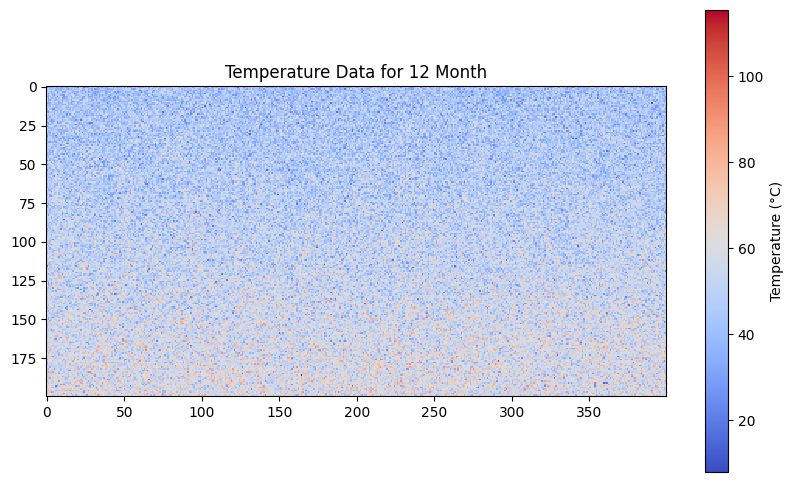

Mean: 43.056423506163576
Standard Deviation: 8.324653431359865
Max: 63.75326982319297
Min: 15.824682978708637


In [ ]:
# Visualization of 2020 temperature for 12 months

for i, band in enumerate(temp_2020, start=1):
	plt.figure(figsize=(10, 6))
	plt.imshow(band, cmap="coolwarm", interpolation="nearest")
	plt.colorbar(label="Temperature (°C)")
	plt.title(f"Temperature Data for {i} Month")
	plt.show()
	# print(f"Mean: {np.mean(band[i])}")
	# print(f"Standard Deviation: {np.std(band[i])}")
	# print(f"Max: {np.max(band[i])}")
	# print(f"Min: {np.min(band[i])}")

In [53]:
# Define the raster file path

# Open the raster file
with rasterio.open(raster_path_2020) as src:
    print("Raster Metadata:\n", src.meta)  # General metadata
    print("\nNumber of bands:", src.count)  # Total bands
    print("\nRaster Profile:\n", src.profile)  # Profile details

    # Check band descriptions (if available)
    if hasattr(src, 'descriptions'):
        print("\nBand Descriptions:", src.descriptions)  # List of band names

Raster Metadata:
 {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 400, 'height': 200, 'count': 12, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.020500000000000008, 0.0, 80.0,
       0.0, -0.020999999999999998, 30.5)}

Number of bands: 12

Raster Profile:
 {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 400, 'height': 200, 'count': 12, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [68]:
type(band[0])

numpy.ndarray

In [69]:
band[0]

array([33.15770369, 37.49923874, 29.04440949, 32.35674875, 41.79726767,
       55.58724212, 20.52182752, 47.70876133, 40.44727081, 45.64323984,
       42.74061262, 36.02444122, 29.78720679, 30.83621121, 58.23917248,
       38.35692705, 45.70412462, 36.93126415, 39.89614124, 43.33851609,
       61.02247245, 34.015428  , 54.19781677, 45.29028865, 37.00063006,
       46.71721052, 50.03718594, 41.26979371, 53.26029095, 39.74234758,
       51.2151443 , 43.68312249, 35.43919118, 37.8980978 , 57.14675871,
       34.7699462 , 34.13687998, 47.99733062, 43.5778802 , 28.25071268,
       44.52288216, 36.35265374, 55.53123515, 42.68858475, 48.57274641,
       56.00730523, 42.08297316, 32.69348419, 22.32514616, 58.54108886,
       45.96800848, 56.07811877, 45.86345537, 31.43336664, 47.54537262,
       49.46607736, 52.75728624, 43.20009329, 56.48413574, 52.25629386,
       42.40672493, 38.60329508, 26.24370156, 46.09630393, 43.85611041,
       62.74888416, 52.53562237, 34.5242926 , 27.87507943, 40.11

In [70]:
band[0].shape

(400,)

In [71]:
band[1].shape

(400,)

In [72]:
band[10]

array([60.47439566, 39.57543234, 48.50435794, 57.52852405, 52.52001785,
       40.07401814, 58.81490966, 64.10141284, 31.53289519, 58.46739511,
       34.23090783, 51.69199861, 42.85163928, 43.42642123, 44.73770326,
       55.41300145, 41.06398008, 28.74951624, 46.80461171, 39.96807886,
       39.93787604, 34.37890675, 50.50701829, 46.97537939, 56.18362495,
       53.27296542, 52.27429975, 38.9721469 , 37.3921089 , 38.46819242,
       57.78899572, 56.39315469, 40.51141909, 50.20711098, 45.98480644,
       46.34189604, 44.99836554, 31.53741783, 37.84885283, 47.76670529,
       34.30523131, 57.3179083 , 35.64866524, 38.68522014, 47.27523537,
       37.8320727 , 52.79707294, 28.94529815, 51.64845625, 36.43675361,
       37.65345055, 37.65973833, 41.9004611 , 37.5285903 , 43.1651859 ,
       45.5468667 , 45.29884856, 38.76264857, 41.83496318, 45.27044972,
       41.94585611, 45.02775879, 37.41566162, 39.45616321, 35.77441886,
       52.9381717 , 40.13318866, 38.47267236, 62.67681954, 55.48

In [76]:
band[4].max()

64.02896756919353

In [75]:
band[4].min()

23.044191082663747

In [84]:
a = 0
for i in band[6]:
	print(f"{a} :: {i}")
	a += 1

0 :: 46.0073836273975
1 :: 31.32936535542412
2 :: 54.59421529632366
3 :: 44.07593541048748
4 :: 36.577048703662285
5 :: 26.56442098876987
6 :: 47.55812103921892
7 :: 47.23092032225343
8 :: 47.73296436248534
9 :: 35.00090058791724
10 :: 29.42312821247328
11 :: 27.371643834650776
12 :: 57.13284128858575
13 :: 49.00890006292081
14 :: 38.99822313935738
15 :: 45.36851545609942
16 :: 48.41091271727328
17 :: 63.037943638234935
18 :: 44.671920024753874
19 :: 36.067607950741454
20 :: 39.06088938744903
21 :: 45.173509059141864
22 :: 45.85286304557011
23 :: 53.20763133882956
24 :: 49.14860735573145
25 :: 42.88227326107566
26 :: 46.15691845908909
27 :: 24.72207137908329
28 :: 47.26579283705191
29 :: 32.293601938847445
30 :: 45.99077297695382
31 :: 32.382183931813344
32 :: 29.793493805961653
33 :: 45.72499311034504
34 :: 29.547785176509986
35 :: 43.07949434977061
36 :: 29.284843522289183
37 :: 43.34772770855395
38 :: 38.260276571221446
39 :: 48.30079495362644
40 :: 37.0320627465122
41 :: 29.5035146

In [85]:
band[6].min()

19.335124636058666

In [86]:
band[6].max()

67.34787067905194